In [ ]:
import sqlite3
import seaborn as sns 
import matplotlib.pyplot as plt
import pandas as pd 
pd.set_option('display.max_columns', None)
import numpy as np
import json
import warnings 
from calculations import InfraCalculate as inf 
import datetime
from datetime import datetime, timedelta
import threading
import time
import schedule
import warnings 
warnings.filterwarnings('ignore')
from statsmodels.tsa.stattools import acf, pacf
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

def liveDataHandler(db_path, table_name):
# Connect to the SQLite database.
    conn = sqlite3.connect(db_path)
    query = f"""
    SELECT * FROM '{table_name}' 
    """
    dataset = pd.read_sql_query(query, conn)
    dataset.to_parquet('modellingData.parquet', engine='fastparquet', index=False)
    conn.close()
    dataset = pd.read_parquet('modellingData.parquet', engine='fastparquet')
    return dataset

data = liveDataHandler('EdgeDB', 'infraData')
data['HostAndIP'] = data['Hostname'] + data['IPAddress'].str.replace('"', '')

if not data.empty:
    emptyData = False 
else:
    empytyDdata = True

In [1]:
from sqlalchemy import create_engine
connection_string = f"mssql+pyodbc://{'sa'}:{'data_science_1234'}@{'EdgeAnalyticsDa'}/{'DynatraceAPI'}?driver=ODBC+Driver+17+for+SQL+Server"
    # connection_string = f'DRIVER={{ODBC Driver 17 for SQL Server}};SERVER={server};DATABASE={database};UID={username};PWD={password}'
connection = create_engine(connection_string) 

query = f"SELECT * FROM {'infraData'}"

In [5]:
import sqlite3
import pandas as pd
conn = sqlite3.connect('EdgeDB')  
query = "SELECT * FROM Infra_Utilization;"  
dataset = pd.read_sql_query(query, conn)  
# conn.close()  # Make sure to close the connection  
# output_queue.put(dataset)  # Put the dataset into the queue  

In [7]:
dataset

LogTimestamp   CPUUsage  MemoryUsage  TotalMemory  DiskUsage  \
0        2025-01-01 02:06:10   0.000000    43.599998         25.0  32.599998   
1        2025-01-01 02:07:25  22.100000    67.199997         30.0  64.199997   
2        2025-01-01 02:08:31   9.700000    71.500000         16.0  52.799999   
3        2025-01-01 02:08:31   9.700000    71.500000         16.0   7.100000   
4        2025-01-01 02:07:40   0.000000    59.099998          4.0  82.099998   
...                      ...        ...          ...          ...        ...   
2067514  2025-02-06 11:52:15  16.900000    92.900002          8.0  53.400002   
2067515  2025-02-06 11:52:15  16.900000    92.900002          8.0   3.000000   
2067516  2025-02-06 11:52:24  57.400002    79.699997         30.0  86.699997   
2067517  2025-02-06 11:52:36   0.000000    53.099998         16.0   0.400000   
2067518  2025-02-06 11:52:36   0.000000    56.000000         16.0  74.300003   

         TotalFreeDiskGB  TotalDiskSpaceGB  DiskLatency  ReadLatency  \
0             404.549988        600.000000          0.0          0.0   
1             277.109985        773.000000          0.0          0.0   
2              46.990002         99.459999          0.0          0.0   
3              92.889999         99.980003          0.0          0.0   
4              12.560000         70.099998          0.0          0.0   
...                  ...               ...          ...          ...   
2067514        46.330002         99.459999          0.0          0.0   
2067515       194.059998        199.979996          0.0          0.0   
2067516        48.049999        361.480011          0.0          0.0   
2067517        99.620003         99.980003          0.0          0.0   
2067518        25.540001         99.459999          0.0          0.0   

         WriteLatency  ...                                       IPAddress  \
0                 0.0  ...  ["128.1.0.30", "172.19.153.15", "172.27.5.50"]   
1                 0.0  ...                                ["172.27.4.102"]   
2                 0.0  ...                                 ["172.24.3.13"]   
3                 0.0  ...                                 ["172.24.3.13"]   
4                 0.0  ...                             ["192.168.252.101"]   
...               ...  ...                                             ...   
2067514           0.0  ...                                 ["172.24.1.92"]   
2067515           0.0  ...                                 ["172.24.1.92"]   
2067516           0.0  ...                                ["172.27.4.102"]   
2067517           0.0  ...                                ["172.27.4.246"]   
2067518           0.0  ...                                ["172.27.4.248"]   

            OperatingSystem  ManagementZone Datacenter DatacenterRegion  \
0        Windows 2019Server      APPSUPPORT      Lagos        Marina-HQ   
1        Windows 2019Server      APPSUPPORT      Lagos        Marina-HQ   
2        Windows 2019Server      APPSUPPORT      Lagos        Marina-HQ   
3        Windows 2019Server      APPSUPPORT      Lagos        Marina-HQ   
4        Windows 2019Server         Wema_HQ   Lagos_HQ           Marina   
...                     ...             ...        ...              ...   
2067514  Windows 2019Server         Wema_HQ   Lagos_HQ           Marina   
2067515  Windows 2019Server         Wema_HQ   Lagos_HQ           Marina   
2067516  Windows 2019Server      APPSUPPORT      Lagos        Marina-HQ   
2067517  Windows 2019Server      APPSUPPORT      Lagos        Marina-HQ   
2067518  Windows 2019Server         Wema_HQ   Lagos_HQ           Marina   

        ApplicationName       ApplicationOwner        Vendor  \
0                  NACS             APPSUPPORT           NCR   
1                   SMS             APPSUPPORT        TERMII   
2               SWIFTMQ             APPSUPPORT           AEG   
3               SWIFTMQ             APPSUPPORT           AEG   
4                  TAMS  SWITCHI

In [20]:
cons = sqlite3.connect('EdgeDB')
querys = "SELECT COUNT(*) FROM RefreshLogs;"
items = cons.execute(querys)
items.fetchone()[0]

25

In [44]:
# import sqlite3
# import pandas as pd
conn = sqlite3.connect('EdgeDB')  
query = f"""
SELECT * FROM Infra_Utilization
WHERE LogTimestamp >= (SELECT MAX(LogTimestamp) FROM Infra_Utilization)
 ORDER BY LogTimestamp DESC LIMIT 10000;
"""  
dataset = pd.read_sql_query(query, conn)  
# where Logtimestamp > '2025-01-01' and LogTimestamp <= '2025-01-02';
dataset

DatabaseError: Execution failed on sql '
SELECT * FROM Infra_Utilization
WHERE LogTimestamp >= (SELECT MAX(LogTimestamp) FROM Infra_Utilization)
 ORDER BY LogTimestamp DESC LIMIT 10000;
': database is locked

In [52]:
with sqlite3.connect('EdgeDB') as conn:
    cursor = conn.cursor()
    we = "SELECT * FROM  Infra_Utilization;"
    dataset = pd.read_sql_query(we, conn)        

dataset

LogTimestamp   CPUUsage  MemoryUsage  TotalMemory  DiskUsage  \
0        2025-01-01 02:06:10   0.000000    43.599998         25.0  32.599998   
1        2025-01-01 02:07:25  22.100000    67.199997         30.0  64.199997   
2        2025-01-01 02:08:31   9.700000    71.500000         16.0  52.799999   
3        2025-01-01 02:08:31   9.700000    71.500000         16.0   7.100000   
4        2025-01-01 02:07:40   0.000000    59.099998          4.0  82.099998   
...                      ...        ...          ...          ...        ...   
2067514  2025-02-06 11:52:15  16.900000    92.900002          8.0  53.400002   
2067515  2025-02-06 11:52:15  16.900000    92.900002          8.0   3.000000   
2067516  2025-02-06 11:52:24  57.400002    79.699997         30.0  86.699997   
2067517  2025-02-06 11:52:36   0.000000    53.099998         16.0   0.400000   
2067518  2025-02-06 11:52:36   0.000000    56.000000         16.0  74.300003   

         TotalFreeDiskGB  TotalDiskSpaceGB  DiskLatency  ReadLatency  \
0             404.549988        600.000000          0.0          0.0   
1             277.109985        773.000000          0.0          0.0   
2              46.990002         99.459999          0.0          0.0   
3              92.889999         99.980003          0.0          0.0   
4              12.560000         70.099998          0.0          0.0   
...                  ...               ...          ...          ...   
2067514        46.330002         99.459999          0.0          0.0   
2067515       194.059998        199.979996          0.0          0.0   
2067516        48.049999        361.480011          0.0          0.0   
2067517        99.620003         99.980003          0.0          0.0   
2067518        25.540001         99.459999          0.0          0.0   

         WriteLatency  ...                                       IPAddress  \
0                 0.0  ...  ["128.1.0.30", "172.19.153.15", "172.27.5.50"]   
1                 0.0  ...                                ["172.27.4.102"]   
2                 0.0  ...                                 ["172.24.3.13"]   
3                 0.0  ...                                 ["172.24.3.13"]   
4                 0.0  ...                             ["192.168.252.101"]   
...               ...  ...                                             ...   
2067514           0.0  ...                                 ["172.24.1.92"]   
2067515           0.0  ...                                 ["172.24.1.92"]   
2067516           0.0  ...                                ["172.27.4.102"]   
2067517           0.0  ...                                ["172.27.4.246"]   
2067518           0.0  ...                                ["172.27.4.248"]   

            OperatingSystem  ManagementZone Datacenter DatacenterRegion  \
0        Windows 2019Server      APPSUPPORT      Lagos        Marina-HQ   
1        Windows 2019Server      APPSUPPORT      Lagos        Marina-HQ   
2        Windows 2019Server      APPSUPPORT      Lagos        Marina-HQ   
3        Windows 2019Server      APPSUPPORT      Lagos        Marina-HQ   
4        Windows 2019Server         Wema_HQ   Lagos_HQ           Marina   
...                     ...             ...        ...              ...   
2067514  Windows 2019Server         Wema_HQ   Lagos_HQ           Marina   
2067515  Windows 2019Server         Wema_HQ   Lagos_HQ           Marina   
2067516  Windows 2019Server      APPSUPPORT      Lagos        Marina-HQ   
2067517  Windows 2019Server      APPSUPPORT      Lagos        Marina-HQ   
2067518  Windows 2019Server         Wema_HQ   Lagos_HQ           Marina   

        ApplicationName       ApplicationOwner        Vendor  \
0                  NACS             APPSUPPORT           NCR   
1                   SMS             APPSUPPORT        TERMII   
2               SWIFTMQ             APPSUPPORT           AEG   
3               SWIFTMQ             APPSUPPORT           AEG   
4                  TAMS  SWITCHI

In [54]:
dataset.loc[dataset.LogTimestamp >= '2025-02-06']

LogTimestamp   CPUUsage  MemoryUsage  TotalMemory  DiskUsage  \
2003193  2025-02-06 00:04:07   0.000000    62.400002         10.0  49.200001   
2003194  2025-02-06 00:04:07   0.300000    55.299999         16.0   1.800000   
2003195  2025-02-06 00:04:13   0.800000    94.199997         24.0  62.400002   
2003196  2025-02-06 00:04:35   3.300000    41.900002         25.0  87.099998   
2003197  2025-02-06 00:05:05  10.000000    93.099998          8.0   0.200000   
...                      ...        ...          ...          ...        ...   
2067514  2025-02-06 11:52:15  16.900000    92.900002          8.0  53.400002   
2067515  2025-02-06 11:52:15  16.900000    92.900002          8.0   3.000000   
2067516  2025-02-06 11:52:24  57.400002    79.699997         30.0  86.699997   
2067517  2025-02-06 11:52:36   0.000000    53.099998         16.0   0.400000   
2067518  2025-02-06 11:52:36   0.000000    56.000000         16.0  74.300003   

         TotalFreeDiskGB  TotalDiskSpaceGB  DiskLatency  ReadLatency  \
2003193       101.410004        199.660004          0.0          0.0   
2003194       196.440002        200.000000          0.0          0.0   
2003195        56.360001        149.899994          0.0          0.0   
2003196        15.610000        120.660004          0.0          0.0   
2003197        99.820000         99.980003          0.0          0.0   
...                  ...               ...          ...          ...   
2067514        46.330002         99.459999          0.0          0.0   
2067515       194.059998        199.979996          0.0          0.0   
2067516        48.049999        361.480011          0.0          0.0   
2067517        99.620003         99.980003          0.0          0.0   
2067518        25.540001         99.459999          0.0          0.0   

         WriteLatency  ...                                       IPAddress  \
2003193           0.0  ...                                ["172.27.5.240"]   
2003194           0.0  ...                                ["172.27.4.248"]   
2003195           0.0  ...                                ["172.27.4.166"]   
2003196           0.0  ...  ["128.1.0.30", "172.19.153.15", "172.27.5.50"]   
2003197           0.0  ...                                 ["172.24.1.92"]   
...               ...  ...                                             ...   
2067514           0.0  ...                                 ["172.24.1.92"]   
2067515           0.0  ...                                 ["172.24.1.92"]   
2067516           0.0  ...                                ["172.27.4.102"]   
2067517           0.0  ...                                ["172.27.4.246"]   
2067518           0.0  ...                                ["172.27.4.248"]   

            OperatingSystem  ManagementZone Datacenter DatacenterRegion  \
2003193  Windows 2019Server      APPSUPPORT      Lagos        Marina-HQ   
2003194  Windows 2019Server         Wema_HQ   Lagos_HQ           Marina   
2003195  Windows 2019Server      APPSUPPORT      Lagos        Marina-HQ   
2003196  Windows 2019Server      APPSUPPORT      Lagos        Marina-HQ   
2003197  Windows 2019Server         Wema_HQ   Lagos_HQ           Marina   
...                     ...             ...        ...              ...   
2067514  Windows 2019Server         Wema_HQ   Lagos_HQ           Marina   
2067515  Windows 2019Server         Wema_HQ   Lagos_HQ           Marina   
2067516  Windows 2019Server      APPSUPPORT      Lagos        Marina-HQ   
2067517  Windows 2019Server      APPSUPPORT      Lagos        Marina-HQ   
2067518  Windows 2019Server         Wema_HQ   Lagos_HQ           Marina   

        ApplicationName       ApplicationOwner        Vendor  \
2003193         SWIFTMQ             APPSUPPORT           AEG   
2003194         FINTRAK           APPS_SUPPORT       FINTRAK   
2003195    CHEQUE_TRUNC             APPSUPPORT           NCR   
2003196            NACS             APPSUPPORT           NCR   
2003197          IN_APP  SWITCHI

In [59]:
conn = sqlite3.connect('EdgeDB')
query = 'select max(LogTimestamp) from Infra_Utilization;'
cursor = conn.execute(query)
maxdate = cursor.fetchone()[0]
maxdate[:10]

'2025-02-06'

In [41]:
import sqlite3

def remove_max_date_rows():
    conn = sqlite3.connect('EdgeDB')
    cursor = conn.cursor()

    # Get the maximum date
    query_max_date = "SELECT DATE(MAX(LogTimestamp)) FROM Infra_Utilization;"
    cursor.execute(query_max_date)
    max_date = cursor.fetchone()[0]

    # Delete rows that pertain to the maximum date
    query_delete = "DELETE FROM Infra_Utilization WHERE DATE(LogTimestamp) = ?;"
    cursor.execute(query_delete, (max_date,))

    # Commit the changes and close the connection
    conn.commit()
    conn.close()

    return max_date

max_date = remove_max_date_rows()
print(f"Rows pertaining to the maximum date ({max_date}) have been removed.")

OperationalError: database is locked

In [2]:
import sqlite3
def get_max_date():
    conn = sqlite3.connect('EdgeDB')
    query = "SELECT MAX(LogTimestamp) FROM Infra_Utilization;"
    cursor = conn.execute(query)
    max_date = cursor.fetchone()
    conn.close()
    return max_date

max_date = get_max_date()
print(f"The maximum date in the database is: {max_date}")

The maximum date in the database is: ('2025-02-06 11:53:44',)


In [4]:
import pandas as pd
data = pd.read_parquet('workingData.parquet', engine='fastparquet')
data

LogTimestamp   CPUUsage  MemoryUsage  TotalMemory  DiskUsage  \
0        2025-01-01 02:06:10   0.000000    43.599998         25.0  32.599998   
1        2025-01-01 02:07:25  22.100000    67.199997         30.0  64.199997   
2        2025-01-01 02:08:31   9.700000    71.500000         16.0  52.799999   
3        2025-01-01 02:08:31   9.700000    71.500000         16.0   7.100000   
4        2025-01-01 02:07:40   0.000000    59.099998          4.0  82.099998   
...                      ...        ...          ...          ...        ...   
2067514  2025-02-06 11:52:15  16.900000    92.900002          8.0  53.400002   
2067515  2025-02-06 11:52:15  16.900000    92.900002          8.0   3.000000   
2067516  2025-02-06 11:52:24  57.400002    79.699997         30.0  86.699997   
2067517  2025-02-06 11:52:36   0.000000    53.099998         16.0   0.400000   
2067518  2025-02-06 11:52:36   0.000000    56.000000         16.0  74.300003   

         TotalFreeDiskGB  TotalDiskSpaceGB  DiskLatency  ReadLatency  \
0             404.549988        600.000000          0.0          0.0   
1             277.109985        773.000000          0.0          0.0   
2              46.990002         99.459999          0.0          0.0   
3              92.889999         99.980003          0.0          0.0   
4              12.560000         70.099998          0.0          0.0   
...                  ...               ...          ...          ...   
2067514        46.330002         99.459999          0.0          0.0   
2067515       194.059998        199.979996          0.0          0.0   
2067516        48.049999        361.480011          0.0          0.0   
2067517        99.620003         99.980003          0.0          0.0   
2067518        25.540001         99.459999          0.0          0.0   

         WriteLatency  ...                                       IPAddress  \
0                 0.0  ...  ["128.1.0.30", "172.19.153.15", "172.27.5.50"]   
1                 0.0  ...                                ["172.27.4.102"]   
2                 0.0  ...                                 ["172.24.3.13"]   
3                 0.0  ...                                 ["172.24.3.13"]   
4                 0.0  ...                             ["192.168.252.101"]   
...               ...  ...                                             ...   
2067514           0.0  ...                                 ["172.24.1.92"]   
2067515           0.0  ...                                 ["172.24.1.92"]   
2067516           0.0  ...                                ["172.27.4.102"]   
2067517           0.0  ...                                ["172.27.4.246"]   
2067518           0.0  ...                                ["172.27.4.248"]   

            OperatingSystem  ManagementZone Datacenter DatacenterRegion  \
0        Windows 2019Server      APPSUPPORT      Lagos        Marina-HQ   
1        Windows 2019Server      APPSUPPORT      Lagos        Marina-HQ   
2        Windows 2019Server      APPSUPPORT      Lagos        Marina-HQ   
3        Windows 2019Server      APPSUPPORT      Lagos        Marina-HQ   
4        Windows 2019Server         Wema_HQ   Lagos_HQ           Marina   
...                     ...             ...        ...              ...   
2067514  Windows 2019Server         Wema_HQ   Lagos_HQ           Marina   
2067515  Windows 2019Server         Wema_HQ   Lagos_HQ           Marina   
2067516  Windows 2019Server      APPSUPPORT      Lagos        Marina-HQ   
2067517  Windows 2019Server      APPSUPPORT      Lagos        Marina-HQ   
2067518  Windows 2019Server         Wema_HQ   Lagos_HQ           Marina   

        ApplicationName       ApplicationOwner        Vendor  \
0                  NACS             APPSUPPORT           NCR   
1                   SMS             APPSUPPORT        TERMII   
2               SWIFTMQ             APPSUPPORT           AEG   
3               SWIFTMQ             APPSUPPORT           AEG   
4                  TAMS  SWITCHI

In [8]:
conn = sqlite3.connect('EdgeDB')
query = 'select max(LogTimestamp) from Infra_Utilization;'
cursor = conn.execute(query)
maxdate = cursor.fetchone()[0]
maxdate[:10]

'2025-02-06'

In [5]:
data.LogTimestamp.max()

'2025-02-06 11:53:44'

In [35]:
dataset[(dataset.LogTimestamp > '2025-01-01') & (dataset.LogTimestamp <= '2025-01-10')]

Empty DataFrame
Columns: [LogTimestamp, CPUUsage, MemoryUsage, TotalMemory, DiskUsage, TotalFreeDiskGB, TotalDiskSpaceGB, DiskLatency, ReadLatency, WriteLatency, NetworkTrafficAggregate, NetworkTrafficSent, NetworkTrafficReceived, Hostname, IPAddress, OperatingSystem, ManagementZone, Datacenter, DatacenterRegion, ApplicationName, ApplicationOwner, Vendor, OS, DriveLetter]
Index: []

[0 rows x 24 columns]

In [8]:
pd.read_sql(query, con=connection)

LogTimestamp   CPUUsage  MemoryUsage  TotalMemory  DiskUsage  \
0       2025-01-01 02:06:10   0.000000    43.599998         25.0  32.599998   
1       2025-01-01 02:07:25  22.100000    67.199997         30.0  64.199997   
2       2025-01-01 02:08:31   9.700000    71.500000         16.0  52.799999   
3       2025-01-01 02:08:31   9.700000    71.500000         16.0   7.100000   
4       2025-01-01 02:07:40   0.000000    59.099998          4.0  82.099998   
...                     ...        ...          ...          ...        ...   
2067514 2025-02-06 11:52:15  16.900000    92.900002          8.0  53.400002   
2067515 2025-02-06 11:52:15  16.900000    92.900002          8.0   3.000000   
2067516 2025-02-06 11:52:24  57.400002    79.699997         30.0  86.699997   
2067517 2025-02-06 11:52:36   0.000000    53.099998         16.0   0.400000   
2067518 2025-02-06 11:52:36   0.000000    56.000000         16.0  74.300003   

         TotalFreeDiskGB  TotalDiskSpaceGB  DiskLatency  ReadLatency  \
0             404.549988        600.000000          0.0          0.0   
1             277.109985        773.000000          0.0          0.0   
2              46.990002         99.459999          0.0          0.0   
3              92.889999         99.980003          0.0          0.0   
4              12.560000         70.099998          0.0          0.0   
...                  ...               ...          ...          ...   
2067514        46.330002         99.459999          0.0          0.0   
2067515       194.059998        199.979996          0.0          0.0   
2067516        48.049999        361.480011          0.0          0.0   
2067517        99.620003         99.980003          0.0          0.0   
2067518        25.540001         99.459999          0.0          0.0   

         WriteLatency  NetworkTrafficAggregate  NetworkTrafficSent  \
0                 0.0             6.949369e+08        3.977473e+08   
1                 0.0             1.253861e+09        8.803035e+08   
2                 0.0             2.201393e+09        1.093384e+09   
3                 0.0             2.201393e+09        1.093384e+09   
4                 0.0             9.393169e+06        3.725609e+06   
...               ...                      ...                 ...   
2067514           0.0             5.003143e+07        1.676117e+07   
2067515           0.0             5.003143e+07        1.676117e+07   
2067516           0.0             2.054086e+09        8.164271e+08   
2067517           0.0             3.212695e+07        1.151054e+06   
2067518           0.0             4.030296e+07        6.556792e+06   

         NetworkTrafficReceived         Hostname  \
0                  2.971896e+08     WEMA-HQ-NACS   
1                  3.735574e+08      WEMA-HQ-SMS   
2                  1.108009e+09  WEMA-MID-SWFTDB   
3                  1.108009e+09  WEMA-MID-SWFTDB   
4                  5.667560e+06     WEMA-HQ-GPRS   
...                         ...              ...   
2067514            3.327026e+07    WEMA-HQ-SPRDB   
2067515            3.327026e+07    WEMA-HQ-SPRDB   
2067516            1.237659e+09      WEMA-HQ-SMS   
2067517            3.097590e+07      WEMA-CRR-DB   
2067518            3.374617e+07     WEMA-CRR-APP   

                                              IPAddress     OperatingSystem  \
0        ["128.1.0.30", "172.19.153.15", "172.27.5.50"]  Windows 2019Server   
1                                      ["172.27.4.102"]  Windows 2019Server   
2                                       ["172.24.3.13"]  Windows 2019Server   
3                                       ["172.24.3.13"]  Windows 2019Server   
4                                   ["192.168.252.101"]  Windows 2019Server   
...                                                 ...                 ...   
2067514                                 ["172.24.1.92"]  Windows 2019Server   
2067515                                 ["172.24.1.92"]  Windows 2019Server   
2067516                 

In [46]:
data.HostAndIP.nunique()

19

In [2]:
data.Hostname.unique()

array(['WEMA-HQ-NACS', 'WEMA-HQ-SMS', 'WEMA-MID-SWFTDB', 'WEMA-HQ-GPRS',
       'WEMA-HQ-MG1', 'WEMA-HQ-NIB1', 'WEMA-HQ-MGATESMS',
       'WEMA-HQ-ED-DAP', 'WEMA-CTS-WEBDB', 'WEMA-HQ-DYNDSM',
       'WEMA-HQ-SPRDB', 'WEMA-HQ-VIA', 'WEMA-HQ-SPRAP', 'WEMA-HQ-BPMSWB2',
       'WEMA-HQ-BPMSWB1', 'WEMA-AUT-RTSVC', 'WEMA-KACH-UAP',
       'WEMA-HQ-BANKPAS', 'Wema-hq-ISI-DB', 'WEMA-HQ-HCAT',
       'WEMA-HQ-DCIR-RT', 'WEMA-HQ-DPLT', 'WEMA-HQ-DECS-NEW',
       'WEMA-HQ-FINTOL', 'WEMA-HQ-FINTDM', 'WEMA-MID-SWFTAP',
       'WEMA-CRR-APP', 'WEMA-CRR-DB', 'WEMA-LOS-DBCORE', 'WEMA-LOS-DBDOC',
       'WEMA-HQ-IMAPP', 'WEMA-HQ-DCIR-DB', 'WIN-QAERNVCO33V',
       'POSTOFFICE1'], dtype=object)

In [ ]:
diskData = data.copy()
diskData['LogTimestamp'] = pd.to_datetime(data['LogTimestamp'])
diskData.set_index('LogTimestamp', inplace=True) 
diskData = diskData[['TotalFreeDiskGB']]
diskData = diskData[diskData['HostAndIP'] == ss.serverNames]

diskData['DiskChange'] = diskData['TotalFreeDiskGB'].diff()
threshold = 2  # Define a threshold for significant increase
last_interference_index = diskData[diskData['DiskChange'] > threshold].index.max()  # Identify the last point of significant increase (manual deletion) 
diskData = diskData.loc[last_interference_index:][['TotalFreeDiskGB']] 

In [ ]:
import pandas as pd
import warnings 
warnings.filterwarnings('ignore')

# data = pd.read_parquet('workingData.parquet', engine='fastparquet')
# # Assuming `data` is your DataFrame containing the disk space data
# data['LogTimestamp'] = pd.to_datetime(data['LogTimestamp'])
# data.set_index('LogTimestamp', inplace=True)

ds = data[data.Hostname == 'WEMA-HQ-BPMSWB1'] 
# Calculate the difference in TotalFreeDiskGB
ds = ds[['TotalFreeDiskGB']]
ds['DiskChange'] = ds['TotalFreeDiskGB'].diff()

# Identify the last point of significant increase (manual deletion)
threshold = 2  # Define a threshold for significant increase
last_interference_index = ds[ds['DiskChange'] > threshold].index.max()

# # Filter the data from the last interference point
filtered_data = ds.loc[last_interference_index:]


last_interference_index
filtered_data

TotalFreeDiskGB  DiskChange
LogTimestamp                                    
2025-01-25 15:29:06        34.389999    2.209999
2025-01-25 15:30:07        34.389999    0.000000
2025-01-25 15:28:04        34.389999    0.000000
2025-01-25 15:31:09        34.389999    0.000000
2025-01-25 15:33:12        34.389999    0.000000
...                              ...         ...
2025-02-05 09:02:36        31.299999    0.000000
2025-02-05 09:04:39        31.299999    0.000000
2025-02-05 09:05:41        31.299999    0.000000
2025-02-05 09:06:42        31.299999    0.000000
2025-02-05 09:07:43        31.299999    0.000000

[14925 rows x 2 columns]

In [4]:
# columns to use 
df = data[['LogTimestamp', 'HostAndIP', 'CPUUsage', 'MemoryUsage', 'TotalMemory', 'DiskUsage', 'TotalFreeDiskGB', 'TotalDiskSpaceGB', 'NetworkTrafficSent', 'NetworkTrafficReceived']]
df['LogTimestamp'] = pd.to_datetime(df['LogTimestamp'])
# Regression Formular
# Y=0.35(CPUUsage) + 0.25(MemoryUsage) + 0.05(TotalMemory) + 0.15(DiskUsage) + 0.1(TotalFreeDiskGB) + 0.05(TotalDiskSpaceGB) + 0.025(NetworkTrafficSent) + 0.025(NetworkTrafficReceived)

# CPUUsage	0.35
# MemoryUsage	0.25
# TotalMemory	0.05
# DiskUsage	0.15
# TotalFreeDiskGB	0.1
# TotalDiskSpaceGB	0.05
# NetworkTrafficSent	0.025
# NetworkTrafficReceived	0.025

In [5]:
# selecting a particular host as case study 
ds = df[df['HostAndIP'] == 'EdgeServer-New[10.3.0.5]'].reset_index(drop = True)
ds

LogTimestamp                 HostAndIP  CPUUsage  MemoryUsage  \
0      2024-10-22 14:39:33  EdgeServer-New[10.3.0.5]       0.0         37.2   
1      2024-10-22 14:39:33  EdgeServer-New[10.3.0.5]       0.0         37.2   
2      2024-10-22 14:39:53  EdgeServer-New[10.3.0.5]      10.5         37.2   
3      2024-10-22 14:40:25  EdgeServer-New[10.3.0.5]       1.2         37.2   
4      2024-10-22 14:41:26  EdgeServer-New[10.3.0.5]       1.2         37.3   
...                    ...                       ...       ...          ...   
158737 2024-12-03 13:26:30  EdgeServer-New[10.3.0.5]       0.8         51.1   
158738 2024-12-03 13:54:02  EdgeServer-New[10.3.0.5]       0.8         51.3   
158739 2024-12-03 14:25:38  EdgeServer-New[10.3.0.5]       1.2         50.9   
158740 2024-12-03 14:26:39  EdgeServer-New[10.3.0.5]       0.4         51.0   
158741 2024-12-03 14:27:40  EdgeServer-New[10.3.0.5]       1.2         51.1   

        TotalMemory  DiskUsage  TotalFreeDiskGB  TotalDiskSpaceGB  \
0             15.95       24.7            95.24            126.45   
1             15.95        7.7            29.53             32.00   
2             15.95       24.7            95.24            126.45   
3             15.95       24.7            95.24            126.45   
4             15.95       24.7            95.23            126.45   
...             ...        ...              ...               ...   
158737        15.95        7.7            29.52             32.00   
158738        15.95       27.0            92.32            126.45   
158739        15.95        7.7            29.52             32.00   
158740        15.95        7.7            29.52             32.00   
158741        15.95        7.7            29.52             32.00   

        NetworkTrafficSent  NetworkTrafficReceived  
0             1.572388e+07            8.870835e+06  
1             1.572388e+07            8.870835e+06  
2             1.572395e+07            8.870904e+06  
3             1.572403e+07            8.870985e+06  
4             1.572418e+07            8.871177e+06  
...                    ...                     ...  
158737        9.498696e+07            6.215843e+07  
158738        9.502372e+07            6.216447e+07  
158739        9.502984e+07            6.217065e+07  
158740        9.503002e+07            6.217085e+07  
158741        9.503018e+07            6.217104e+07  

[158742 rows x 10 columns]

In [6]:
# clean data 
for i in ds.columns:
    if ds[i].isnull().sum():
        ds[i] = ds[i].interpolate(method='spline', order=2)
    else:
        pass
ds.isnull().sum()

LogTimestamp              0
HostAndIP                 0
CPUUsage                  0
MemoryUsage               0
TotalMemory               0
DiskUsage                 0
TotalFreeDiskGB           0
TotalDiskSpaceGB          0
NetworkTrafficSent        0
NetworkTrafficReceived    0
dtype: int64

In [14]:
ds = data.copy()

In [15]:
ds = data.copy()
ds.set_index('LogTimestamp', inplace = True)
ds = ds.resample('10min').agg({
                        'TotalMemory': 'last',  
                        'TotalFreeDiskGB': 'last',      # Latest TotalMemory value
                        'CPUUsage': 'mean',           # Example: Average CPU usage
                        'MemoryUsage': 'mean',        # Example: Average memory usage
                        'DiskUsage': 'mean',          # Example: Average disk usage
                        'TotalFreeDiskGB': 'last',
                        'NetworkTrafficSent': 'sum',  # Total traffic sent
                        'NetworkTrafficReceived': 'sum' # Total traffic received
}).reset_index()
ds

TypeError: Only valid with DatetimeIndex, TimedeltaIndex or PeriodIndex, but got an instance of 'Index'

In [9]:
# Clean again after resampling 
for i in ds.columns:
    if ds[i].isnull().sum():
        ds[i] = ds[i].interpolate(method='spline', order=2)
    else:
        pass
ds.isnull().sum()

LogTimestamp              0
TotalMemory               0
TotalFreeDiskGB           0
CPUUsage                  0
MemoryUsage               0
DiskUsage                 0
NetworkTrafficSent        0
NetworkTrafficReceived    0
dtype: int64

In [16]:
dx = data.copy()

In [21]:
dx = data.copy()
dx['LogTimestamp'] = pd.to_datetime(dx['LogTimestamp'])
dx.set_index('LogTimestamp', inplace=True)
dx.resample(str(10) +'min').agg({
                        'HostAndIP': 'last',
                        'TotalMemory': 'last',  
                        'TotalFreeDiskGB': 'last',      # Latest freedisk value
                        'CPUUsage': 'mean',           # Example: Average CPU usage
                        'MemoryUsage': 'mean',        # Example: Average memory usage
                        'DiskUsage': 'mean',          # Example: Average disk usage
                        'TotalFreeDiskGB': 'last',
                        'NetworkTrafficSent': 'last',  # Total traffic sent
                        'NetworkTrafficReceived': 'last', # Total traffic received
                        })

HostAndIP  TotalMemory  TotalFreeDiskGB  \
LogTimestamp                                                                    
2024-10-03 16:30:00  GTR-2345678234.179.230.930        15.38            29.11   
2024-10-03 16:40:00  Edge-server[192.168.0.102]        15.38            29.09   
2024-10-03 16:50:00  GTR-2345678234.179.230.930        15.38            29.09   
2024-10-03 17:00:00  GTR-2345678234.179.230.930        15.38            29.10   
2024-10-03 17:10:00  GTR-2345678234.179.230.930        15.38            29.10   
...                                         ...          ...              ...   
2024-12-03 13:50:00    EdgeServer-New[10.3.0.5]        15.95            92.32   
2024-12-03 14:00:00    EdgeServer-New[10.3.0.5]        15.95            92.32   
2024-12-03 14:10:00    EdgeServer-New[10.3.0.5]        15.95            29.52   
2024-12-03 14:20:00    EdgeServer-New[10.3.0.5]        15.95            92.31   
2024-12-03 14:30:00    EdgeServer-New[10.3.0.5]        15.95            29.52   

                      CPUUsage  MemoryUsage  DiskUsage  NetworkTrafficSent  \
LogTimestamp                                                                 
2024-10-03 16:30:00   7.031395    60.387209  87.700000        0.000000e+00   
2024-10-03 16:40:00   8.980423    61.365608  87.700000        0.000000e+00   
2024-10-03 16:50:00   5.443979    61.139267  87.700000        0.000000e+00   
2024-10-03 17:00:00   5.396277    60.578191  87.700000        0.000000e+00   
2024-10-03 17:10:00  11.671809    61.225000  87.700000        0.000000e+00   
...                        ...          ...        ...                 ...   
2024-12-03 13:50:00   1.233333    51.288889  17.350000        9.502470e+07   
2024-12-03 14:00:00   1.250000    50.950000  17.350000        9.502671e+07   
2024-12-03 14:10:00   0.750000    50.900000  17.350000        9.502869e+07   
2024-12-03 14:20:00   0.560000    50.970000  17.350000        9.503066e+07   
2024-12-03 14:30:00   0.690909    51.218182  18.227273        9.506308e+07   

                     NetworkTrafficReceived  
LogTimestamp                                 
2024-10-03 16:30:00            0.000000e+00  
2024-10-03 16:40:00            0.000000e+00  
2024-10-03 16:50:00            0.000000e+00  
2024-10-03 17:00:00            0.000000e+00  
2024-10-03 17:10:00            0.000000e+00  
...                                     ...  
2024-12-03 13:50:00            6.216546e+07  
2024-12-03 14:00:00            6.216748e+07  
2024-12-03 14:10:00            6.216946e+07  
2024-12-03 14:20:00            6.217142e+07  
2024-12-03 14:30:00            6.217312e+07  

[8773 rows x 8 columns]

In [17]:
from sklearn.preprocessing import MinMaxScaler
import joblib

# Define the weights for each feature (should sum to 1)
weights = {
    'CPUUsage': 0.4,
    'MemoryUsage': 0.25,
    'TotalMemory': 0.05,
    'DiskUsage': 0.15,
    'TotalFreeDiskGB': 0.1,
    'NetworkTrafficSent': 0.025,
    'NetworkTrafficReceived': 0.025
}

# Select the relevant columns for normalization
features = ['CPUUsage', 'MemoryUsage', 'TotalMemory', 'DiskUsage', 'TotalFreeDiskGB', 'NetworkTrafficSent', 'NetworkTrafficReceived']

# Normalize the feature values to a 0-1 range
for i in dx.drop('LogTimestamp', axis = 1).columns:
    scaler = MinMaxScaler()
    dx[i] = scaler.fit_transform(dx[[i]])
    joblib.dump(scaler, open(f'{i}_scaler.pkl', 'wb'))

# Calculate the composite metric
dx['CompositeMetric'] = (
    dx['CPUUsage'] * weights['CPUUsage'] +
    dx['MemoryUsage'] * weights['MemoryUsage'] +
    dx['TotalMemory'] * weights['TotalMemory'] +
    dx['DiskUsage'] * weights['DiskUsage'] +
    dx['TotalFreeDiskGB'] * weights['TotalFreeDiskGB'] +
    dx['NetworkTrafficSent'] * weights['NetworkTrafficSent'] +
    dx['NetworkTrafficReceived'] * weights['NetworkTrafficReceived']
).round(2)

dx

LogTimestamp  TotalMemory  TotalFreeDiskGB  CPUUsage  MemoryUsage  \
0    2024-10-22 14:30:00          0.0     2.592414e-07  0.995180     0.000000   
1    2024-10-22 14:40:00          0.0     2.592414e-07  0.994232     0.008261   
2    2024-10-22 14:50:00          0.0     2.592414e-07  0.995642     0.041047   
3    2024-10-22 15:00:00          0.0     2.592414e-07  0.994458     0.048327   
4    2024-10-22 15:10:00          0.0     2.592414e-07  0.994502     0.022029   
...                  ...          ...              ...       ...          ...   
6044 2024-12-03 13:50:00          0.0     1.628036e-03  0.993913     0.872918   
6045 2024-12-03 14:00:00          0.0     1.628036e-03  0.993918     0.851921   
6046 2024-12-03 14:10:00          0.0     0.000000e+00  0.993760     0.848823   
6047 2024-12-03 14:20:00          0.0     1.627777e-03  0.993700     0.853160   
6048 2024-12-03 14:30:00          0.0     0.000000e+00  0.993741     0.868537   

      DiskUsage  NetworkTrafficSent  NetworkTrafficReceived  CompositeMetric  
0      0.047009            0.033093                0.028537             0.41  
1      0.031339            0.148926                0.128431             0.41  
2      0.005876            0.132494                0.114193             0.42  
3      0.000000            0.165747                0.142784             0.42  
4      0.000000            0.149205                0.128542             0.41  
...         ...                 ...                     ...              ...  
6044   0.587607            0.899944                0.899915             0.75  
6045   0.587607            0.999958                0.999936             0.75  
6046   0.587607            0.999979                0.999968             0.75  
6047   0.587607            1.000000                1.000000             0.75  
6048   1.000000            0.550124                0.550017             0.79  

[6049 rows x 9 columns]

In [8]:
data.iloc[data.iloc[-70: ].index.min()]['LogTimestamp']

'2024-12-03 12:14:07'

In [281]:
from statsmodels.tsa.seasonal import seasonal_decompose

# Decompose the time-series
# decomposition = seasonal_decompose(dx['CompositeMetric'], model='additive', period=144)
# dx['CompositeMetric'].fillna(decomposition.trend, inplace = True)
dx['CompositeMetric'] = dx['CompositeMetric'].interpolate(method='spline', order=2)
# dx['CompositeMetric'].fillna(dx['CompositeMetric'].rolling(window=2001, min_periods=1).mean(), inplace = True)


<Axes: xlabel='LogTimestamp', ylabel='CompositeMetric'>

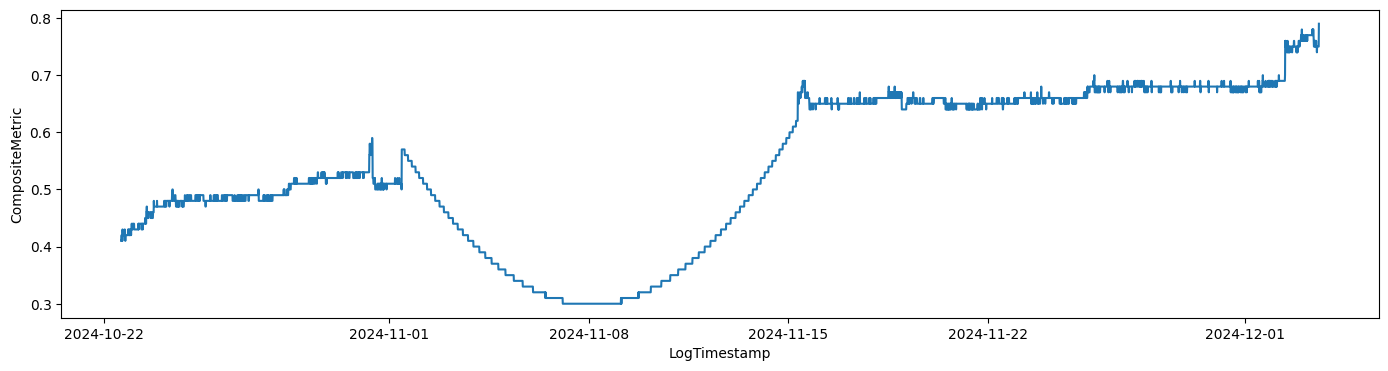

In [16]:
plt.figure(figsize = (17,4))
sns.lineplot(y = dx['CompositeMetric'], x = dx.LogTimestamp)

In [15]:
import numpy as np
import pandas as pd
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error
import joblib

# --- STEP 1: Define the Function to Create Lagged Features and Targets ---
def create_lagged_data(data: pd.Series, daysToPredict: int, lags=144):
    """
    Creates lagged input features (X) and multi-step targets (y).

    Parameters:
    - data: pd.Series containing time-series data.
    - daysToPredict: Number of future days to predict (determines steps ahead).
    - lags: Number of lagged steps to use as features.

    Returns:
    - X: NumPy array of lagged features.
    - y: NumPy array of multi-step targets.
    """
    steps_ahead = daysToPredict * 24 * 6  # 6 steps per hour (10-min intervals)
    X, y = [], []
    for i in range(len(data) - lags - steps_ahead):
        X.append(data[i:i+lags])
        y.append(data[i+lags:i+lags+steps_ahead])
    return np.array(X), np.array(y)

# --- STEP 2: Define the Modelling Function ---
def modelling(daysToPredict: int, lags=1008):
    # Generate lagged data
    X, y = create_lagged_data(dx['CompositeMetric'], daysToPredict, lags=lags)
    split_index = int(len(X) * 0.8)  # Use 80% of the data for training
    X_train, X_test = X[:split_index], X[split_index:]
    y_train, y_test = y[:split_index], y[split_index:]

    # Train the model
    model = RandomForestRegressor(n_estimators=100, random_state=42, n_jobs=-1)
    model.fit(X_train, y_train)

    # Predict for all sequences in the test set
    y_pred = model.predict(X_test)

    # Get the start timestamps for each prediction in the test set
    start_timestamps = dx['LogTimestamp'].iloc[split_index + lags:split_index + lags + len(y_pred)]

    # Flatten the predicted and actual values
    y_pred_flat = y_pred.flatten()
    y_test_flat = y_test.flatten()

    # Generate timestamps for the flattened predictions
    timestamps_flat = []
    for i, start_ts in enumerate(start_timestamps):
        seq_timestamps = pd.date_range(start=start_ts, periods=len(y_pred[i]), freq='10T')
        timestamps_flat.extend(seq_timestamps)

    # Create a DataFrame with actual and predicted values
    results_df = pd.DataFrame({
        'Timestamp': timestamps_flat[:len(y_pred_flat)],
        'Actual': y_test_flat[:len(y_pred_flat)],
        'Predicted': y_pred_flat
    })

    # Round predictions for better readability
    results_df['Predicted'] = results_df['Predicted'].round(2)

    # Calculate MAE
    mae = mean_absolute_error(y_test_flat, y_pred_flat)

    return model, results_df, mae

# Example Usage
model, results_df, mae = modelling(daysToPredict=2, lags=1008)
print(results_df)
print(f"Mean Absolute Error: {mae}")


                 Timestamp  Actual  Predicted
0      2024-11-25 00:10:00    0.66       0.66
1      2024-11-25 00:20:00    0.66       0.66
2      2024-11-25 00:30:00    0.65       0.66
3      2024-11-25 00:40:00    0.65       0.66
4      2024-11-25 00:50:00    0.65       0.66
...                    ...     ...        ...
273883 2024-12-03 13:40:00    0.75       0.68
273884 2024-12-03 13:50:00    0.75       0.68
273885 2024-12-03 14:00:00    0.75       0.68
273886 2024-12-03 14:10:00    0.75       0.68
273887 2024-12-03 14:20:00    0.75       0.68

[273888 rows x 3 columns]
Mean Absolute Error: 0.021418057746233014


In [418]:
results_df

Timestamp  Actual  Predicted
0      2024-11-25 00:10:00    0.66       0.66
1      2024-11-25 00:20:00    0.66       0.66
2      2024-11-25 00:30:00    0.65       0.66
3      2024-11-25 00:40:00    0.65       0.66
4      2024-11-25 00:50:00    0.65       0.66
...                    ...     ...        ...
273883 2024-12-03 13:40:00    0.75       0.68
273884 2024-12-03 13:50:00    0.75       0.68
273885 2024-12-03 14:00:00    0.75       0.68
273886 2024-12-03 14:10:00    0.75       0.68
273887 2024-12-03 14:20:00    0.75       0.68

[273888 rows x 3 columns]

In [419]:
import numpy as np
import pandas as pd
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error

# --- STEP 1: Define the Function to Create Lagged Features and Targets ---
def create_lagged_data(data, daysToPredict, lags=1008 ):
    """
    Creates lagged input features and multi-step targets.

    Parameters:
    - data: DataFrame containing time-series data.
    - target_col: The column to predict (e.g., 'CompositeMetric').
    - lags: Number of lagged steps to use as features.
    - steps_ahead: Number of future steps to predict.

    Returns:
    - X: DataFrame of lagged features.
    - y: DataFrame of multi-step targets.
    """
    steps_ahead = daysToPredict * 24 * 6
    X, y = [], []
    for i in range(len(data) - lags - steps_ahead):
        # Lagged input features
        X.append(data[i:i+lags])
        # Multi-step targets
        y.append(data[i+lags:i+lags+steps_ahead])
    return np.array(X), np.array(y)


def modelling(daysToPredict: int, lags = 144):
    X, y = create_lagged_data(dx['CompositeMetric'].values, daysToPredict, lags = lags)
    split_index = int(len(X) * 0.8)  # Use 80% of the data for training
    X_train, X_test = X[:split_index], X[split_index:]
    y_train, y_test = y[:split_index], y[split_index:]

    model = RandomForestRegressor(n_estimators=100, random_state=42, n_jobs=-1)
    model.fit(X_train, y_train)

    # Predict for all sequences in the test set
    y_pred = model.predict(X_test)  # Predict for all test inputs

    # Get the start timestamps for each prediction in the test set
    start_timestamps = dx['LogTimestamp'].iloc[split_index + lags:split_index + lags + len(y_pred)]


    # Flatten the predicted and actual values for easier alignment
    y_pred_flat = y_pred.flatten()
    y_test_flat = y_test.flatten()


    timestamps_flat = []
    for i, start_ts in enumerate(start_timestamps):
        # Generate timestamps for this sequence
        seq_timestamps = pd.date_range(start=start_ts, periods=len(y_pred[i]), freq='10T')
        timestamps_flat.extend(seq_timestamps)

    results_df = pd.DataFrame({
        'Timestamp': timestamps_flat[:len(y_pred_flat)],  # Ensure timestamps match the flattened arrays
        'Actual': y_test_flat[:len(y_pred_flat)],
        'Predicted': y_pred_flat
    })

    results_df['Predicted'] = results_df['Predicted'].round(2)
    
    return model, results_df

In [451]:
results[['Timestamp','Predicted']].iloc[0:500].sort_values(by = 'Timestamp').head(50)

Timestamp  Predicted
0   2024-11-23 19:20:00       0.65
288 2024-11-23 19:30:00       0.65
1   2024-11-23 19:30:00       0.65
2   2024-11-23 19:40:00       0.65
289 2024-11-23 19:40:00       0.65
290 2024-11-23 19:50:00       0.65
3   2024-11-23 19:50:00       0.65
291 2024-11-23 20:00:00       0.65
4   2024-11-23 20:00:00       0.65
5   2024-11-23 20:10:00       0.65
292 2024-11-23 20:10:00       0.65
6   2024-11-23 20:20:00       0.65
293 2024-11-23 20:20:00       0.65
294 2024-11-23 20:30:00       0.65
7   2024-11-23 20:30:00       0.65
295 2024-11-23 20:40:00       0.65
8   2024-11-23 20:40:00       0.65
296 2024-11-23 20:50:00       0.65
9   2024-11-23 20:50:00       0.65
297 2024-11-23 21:00:00       0.65
10  2024-11-23 21:00:00       0.65
298 2024-11-23 21:10:00       0.65
11  2024-11-23 21:10:00       0.65
12  2024-11-23 21:20:00       0.65
299 2024-11-23 21:20:00       0.65
13  2024-11-23 21:30:00       0.65
300 2024-11-23 21:30:00       0.65
14  2024-11-23 21:40:00       0.65
301 2024-11-23 21:40:00       0.65
15  2024-11-23 21:50:00       0.65
302 2024-11-23 21:50:00       0.65
303 2024-11-23 22:00:00       0.65
16  2024-11-23 22:00:00       0.65
17  2024-11-23 22:10:00       0.65
304 2024-11-23 22:10:00       0.65
305 2024-11-23 22:20:00       0.65
18  2024-11-23 22:20:00       0.65
19  2024-11-23 22:30:00       0.65
306 2024-11-23 22:30:00       0.65
307 2024-11-23 22:40:00       0.65
20  2024-11-23 22:40:00       0.65
21  2024-11-23 22:50:00       0.65
308 2024-11-23 22:50:00       0.65
22  2024-11-23 23:00:00       0.65
309 2024-11-23 23:00:00       0.65
23  2024-11-23 23:10:00       0.65
310 2024-11-23 23:10:00       0.65
311 2024-11-23 23:20:00       0.65
24  2024-11-23 23:20:00       0.65
312 2024-11-23 23:30:00       0.65

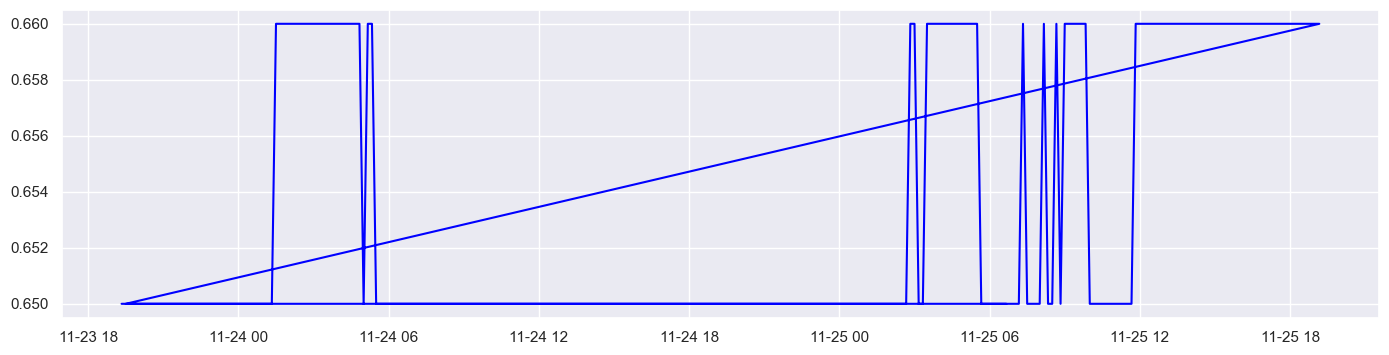

In [446]:
results['Timestamp'] = pd.to_datetime(results['Timestamp'])
plt.figure(figsize=(17, 4))
plt.plot(results['Timestamp'].iloc[0:500], results['Predicted'].iloc[0:500], label='Actual',  color='blue')

In [ ]:
model, results = modelling(2)
results.head(50)

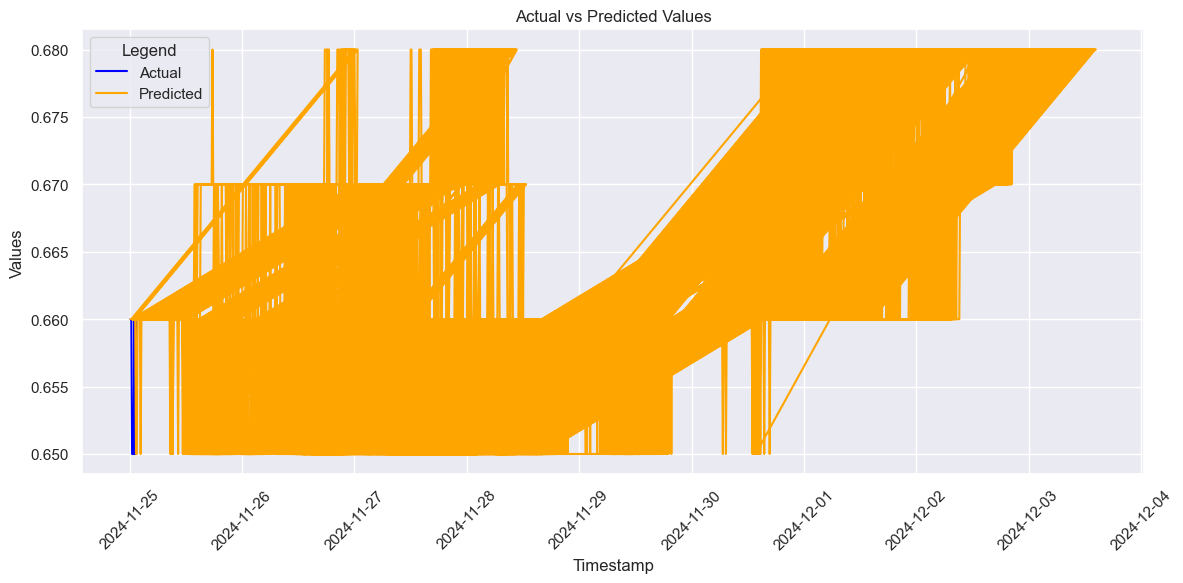

In [441]:
plt.figure(figsize=(12, 6))

results_df['Timestamp'] = pd.to_datetime(results_df['Timestamp'])
# Plot Actual values
plt.plot(results_df['Timestamp'], results_df['Actual'], label='Actual',  color='blue')

# Plot Predicted values
plt.plot(results_df['Timestamp'], results_df['Predicted'], label='Predicted', color='orange')

# Customize the plot
plt.title('Actual vs Predicted Values')
plt.xlabel('Timestamp')
plt.ylabel('Values')
plt.xticks(rotation=45)
plt.legend(title='Legend')
plt.tight_layout()

In [425]:
results.shape

(323712, 3)

In [422]:
print(r2_score(results['Actual'], results['Predicted']))

-2.7993579103740722


In [228]:
def create_multi_step_data(data, lags, steps_ahead):
    """
    Generate lagged features (X) and multi-step targets (y).
    
    Parameters:
    - data: Time-series data (e.g., CPU usage as a NumPy array).
    - lags: Number of lagged steps to use as input features.
    - steps_ahead: Number of future steps to predict.

    Returns:
    - X: Input features (lagged values).
    - y: Target values (future steps).
    """
    X, y = [], []
    for i in range(len(data) - lags - steps_ahead):
        X.append(data[i:i+lags])  # Lagged values
        y.append(data[i+lags:i+lags+steps_ahead])  # Future values
    return np.array(X), np.array(y)

# using 2days historical data 
x, y = create_multi_step_data(dx, 288, 144)

In [ ]:
plt.figure(figsize = (17, 4))
plot_acf(ds['CPUUsage'])  # Generates the plot with default lags

In [1]:
import numpy as np
import pandas as pd
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error

# --- STEP 1: Define the Function to Create Lagged Features and Targets ---
def create_lagged_data(data, lags, steps_ahead):
    """
    Creates lagged input features and multi-step targets.

    Parameters:
    - data: DataFrame containing time-series data.
    - target_col: The column to predict (e.g., 'CompositeMetric').
    - lags: Number of lagged steps to use as features.
    - steps_ahead: Number of future steps to predict.

    Returns:
    - X: DataFrame of lagged features.
    - y: DataFrame of multi-step targets.
    """
    X, y = [], []
    for i in range(len(data) - lags - steps_ahead):
        # Lagged input features
        X.append(data[i:i+lags])
        # Multi-step targets
        y.append(data[i+lags:i+lags+steps_ahead])
    return np.array(X), np.array(y)

# --- STEP 2: Prepare Data for Lagged Features ---
# Reset index for easier manipulation
dx = dx.reset_index()

# Set parameters
lags =144   # 2 days of lag (144 steps per day, 10-min intervals)
steps_ahead = 18  # Predict 2 days into the future (288 steps)

# Create lagged features and targets
X, y = create_lagged_data(dx['CompositeMetric'].values, lags, steps_ahead)

print(f'done with the lagging and step ahead\n')

# --- STEP 3: Train-Test Split ---
# Split data without shuffling to preserve chronological order
split_index = int(len(X) * 0.8)  # Use 80% of the data for training


X_train, X_test = X[:split_index], X[split_index:]
y_train, y_test = y[:split_index], y[split_index:]

print(f'Starting training...\n')
# --- STEP 4: Train the Model ---
# Train a Random Forest model for multi-step prediction
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)
print(f'Done Training ....\n')

# --- STEP 5: Predict on the Test Data ---
# Predict future steps for each input in the test set
y_pred = model.predict(X_test)

# --- STEP 6: Evaluate the Model ---
# Evaluate using Mean Absolute Error (MAE) for multi-step predictions
mae = mean_absolute_error(y_test, y_pred)
print(f"Mean Absolute Error (MAE): {mae}")


NameError: name 'dx' is not defined

In [362]:
# Predict for all sequences in the test set
y_pred = model.predict(X_test)  # Predict for all test inputs

# Get the start timestamps for each prediction in the test set
start_timestamps = dx['LogTimestamp'].iloc[split_index + lags:split_index + lags + len(y_pred)]


# Flatten the predicted and actual values for easier alignment
y_pred_flat = y_pred.flatten()
y_test_flat = y_test.flatten()


timestamps_flat = []
for i, start_ts in enumerate(start_timestamps):
    # Generate timestamps for this sequence
    seq_timestamps = pd.date_range(start=start_ts, periods=len(y_pred[i]), freq='10T')
    timestamps_flat.extend(seq_timestamps)

results_df = pd.DataFrame({
    'Timestamp': timestamps_flat[:len(y_pred_flat)],  # Ensure timestamps match the flattened arrays
    'Actual': y_test_flat[:len(y_pred_flat)],
    'Predicted': y_pred_flat
})

results_df['Predicted'] = results_df['Predicted'].round(2)
results_df

Timestamp  Actual  Predicted
0     2024-11-25 07:20:00    0.38       0.30
1     2024-11-25 07:30:00    0.28       0.30
2     2024-11-25 07:40:00    0.27       0.31
3     2024-11-25 07:50:00    0.28       0.31
4     2024-11-25 08:00:00    0.27       0.31
...                   ...     ...        ...
21199 2024-12-03 13:40:00    0.47       0.33
21200 2024-12-03 13:50:00    0.47       0.33
21201 2024-12-03 14:00:00    0.47       0.32
21202 2024-12-03 14:10:00    0.36       0.32
21203 2024-12-03 14:20:00    0.46       0.32

[21204 rows x 3 columns]

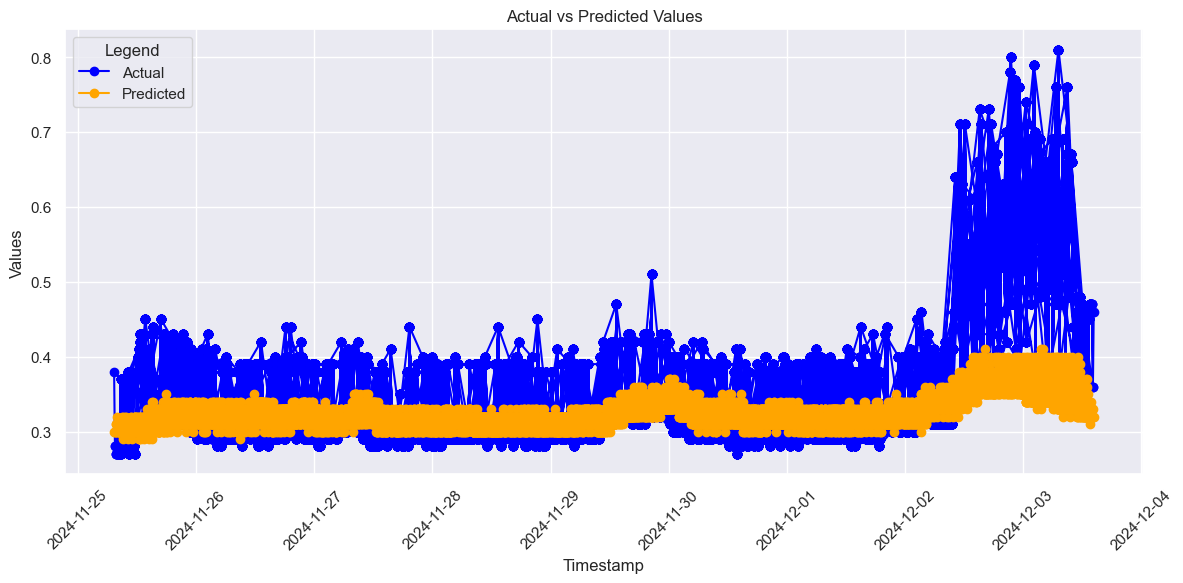

In [370]:
plt.figure(figsize=(12, 6))

# Plot Actual values
plt.plot(results_df['Timestamp'], results_df['Actual'], label='Actual', marker='o', color='blue')

# Plot Predicted values
plt.plot(results_df['Timestamp'], results_df['Predicted'], label='Predicted', marker='o', color='orange')

# Customize the plot
plt.title('Actual vs Predicted Values')
plt.xlabel('Timestamp')
plt.ylabel('Values')
plt.xticks(rotation=45)
plt.legend(title='Legend')
plt.tight_layout()

In [352]:
latest_data = dx['CompositeMetric'].values[-lags:]

y_pred = model.predict(latest_data.reshape(1, -1))[0]  # Output is an array of 288 values

# Define the start timestamp for the predictions
start_timestamp = dx['LogTimestamp'].iloc[-1] 

future_timestamps = pd.date_range(start=start_timestamp, periods=len(y_pred)+1, freq='10T')[1:]

predictions_df = pd.DataFrame({
    'Timestamp': future_timestamps,
    'Predicted_CompositeMetric': y_pred
})

predictions_df

Timestamp  Predicted_CompositeMetric
0  2024-12-03 14:40:00                     0.3869
1  2024-12-03 14:50:00                     0.3798
2  2024-12-03 15:00:00                     0.3590
3  2024-12-03 15:10:00                     0.3512
4  2024-12-03 15:20:00                     0.3572
5  2024-12-03 15:30:00                     0.3465
6  2024-12-03 15:40:00                     0.3505
7  2024-12-03 15:50:00                     0.3419
8  2024-12-03 16:00:00                     0.3459
9  2024-12-03 16:10:00                     0.3616
10 2024-12-03 16:20:00                     0.3569
11 2024-12-03 16:30:00                     0.3391
12 2024-12-03 16:40:00                     0.3298
13 2024-12-03 16:50:00                     0.3285
14 2024-12-03 17:00:00                     0.3295
15 2024-12-03 17:10:00                     0.3232
16 2024-12-03 17:20:00                     0.3248
17 2024-12-03 17:30:00                     0.3224

In [311]:

# --- STEP 7: Combine Predictions and Actuals into a DataFrame for Visualization ---
# Flatten predictions and test data for easy comparison
timestamps = dx['LogTimestamp'].iloc[split_index + lags:split_index + lags + len(y_pred)]

predictions_df = pd.DataFrame({
    'Timestamp': timestamps,  # Start timestamps for each prediction sequence
    'Actual': [list(seq) for seq in y_test],  # Store the actual sequence as a list
    'Predicted': [list(seq) for seq in y_pred]  # Store the predicted sequence as a list
})



# Optional: Visualize the results
# import matplotlib.pyplot as plt

# plt.figure(figsize=(12, 6))
# plt.plot(predictions_df['Timestamp'], predictions_df['Actual'], label='Actual', color='blue')
# plt.plot(predictions_df['Timestamp'], predictions_df['Predicted'], label='Predicted', color='red')
# plt.title('Actual vs Predicted Composite Metric')
# plt.xlabel('Timestamp')
# plt.ylabel('Composite Metric')
# plt.legend()
# plt.grid()
# plt.show()
[round(i, 2) for i in predictions_df.iloc[0][['Predicted']].values[0]]
# predictions_df.iloc[0][['Predicted']].values[0]
# predictions_df

[0.3,
 0.3,
 0.31,
 0.31,
 0.31,
 0.31,
 0.3,
 0.31,
 0.3,
 0.3,
 0.3,
 0.31,
 0.3,
 0.3,
 0.31,
 0.31,
 0.31,
 0.31]

ValueError: setting an array element with a sequence.

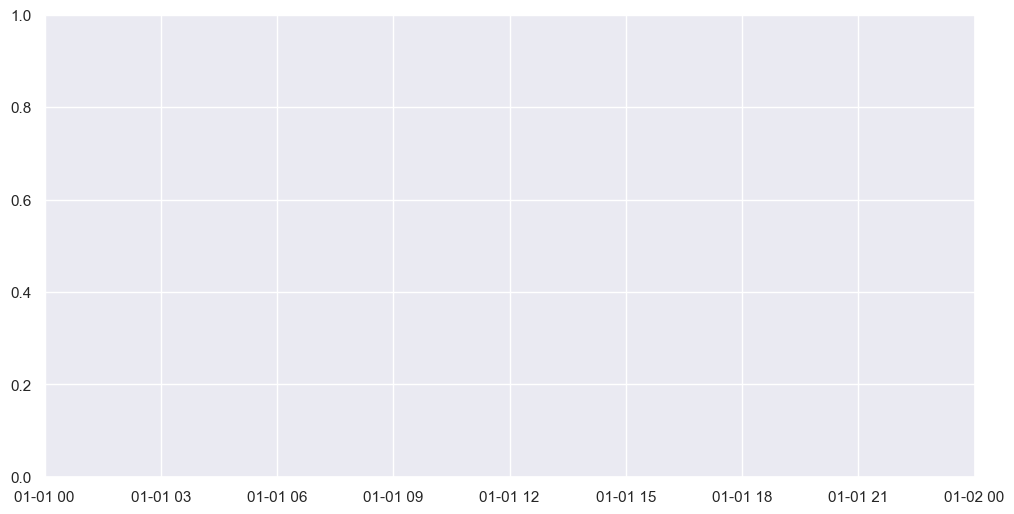

In [294]:
plt.figure(figsize=(12, 6))
plt.plot(predictions_df['Timestamp'], predictions_df['Actual'], label='Actual', color='blue')
plt.plot(predictions_df['Timestamp'], predictions_df['Predicted'], label='Predicted', color='red')
plt.title('Actual vs Predicted Composite Metric')
plt.xlabel('Timestamp')
plt.ylabel('Composite Metric')
plt.legend()
plt.grid()
plt.show()

In [293]:
timestamps = dx['LogTimestamp'].iloc[split_index + lags:split_index + lags + len(y_pred)]

# Create a DataFrame for predictions (one row per sequence)
predictions_df = pd.DataFrame({
    'Timestamp': timestamps,  # Start timestamps for each prediction sequence
    'Actual': [list(seq) for seq in y_test],  # Store the actual sequence as a list
    'Predicted': [list(seq) for seq in y_pred]  # Store the predicted sequence as a list
})

# Display the predictions DataFrame
predictions_df

Timestamp                                             Actual  \
4666 2024-11-24 00:10:00  [0.36, 0.27, 0.29, 0.28, 0.28, 0.28, 0.37, 0.2...   
4667 2024-11-24 00:20:00  [0.27, 0.29, 0.28, 0.28, 0.28, 0.37, 0.28, 0.2...   
4668 2024-11-24 00:30:00  [0.29, 0.28, 0.28, 0.28, 0.37, 0.28, 0.28, 0.2...   
4669 2024-11-24 00:40:00  [0.28, 0.28, 0.28, 0.37, 0.28, 0.28, 0.28, 0.2...   
4670 2024-11-24 00:50:00  [0.28, 0.28, 0.37, 0.28, 0.28, 0.28, 0.27, 0.4...   
...                  ...                                                ...   
5756 2024-12-01 13:50:00  [0.28, 0.38, 0.38, 0.29, 0.38, 0.29, 0.4, 0.44...   
5757 2024-12-01 14:00:00  [0.38, 0.38, 0.29, 0.38, 0.29, 0.4, 0.44, 0.34...   
5758 2024-12-01 14:10:00  [0.38, 0.29, 0.38, 0.29, 0.4, 0.44, 0.34, 0.36...   
5759 2024-12-01 14:20:00  [0.29, 0.38, 0.29, 0.4, 0.44, 0.34, 0.36, 0.34...   
5760 2024-12-01 14:30:00  [0.38, 0.29, 0.4, 0.44, 0.34, 0.36, 0.34, 0.41...   

                                              Predicted  
4666  [0.30125554386286485, 0.30725917778323936, 0.3...  
4667  [0.3043790677170247, 0.2980817813360694, 0.306...  
4668  [0.3064966543942668, 0.29340069849160877, 0.31...  
4669  [0.29848181872633633, 0.30738674149571305, 0.3...  
4670  [0.31115243535429205, 0.3093593416010378, 0.30...  
...                                                 ...  
5756  [0.3189048651019746, 0.30910782071192394, 0.32...  
5757  [0.31356732797079195, 0.32327156176745175, 0.3...  
5758  [0.3173802618219085, 0.3129874710696517, 0.309...  
5759  [0.308692438164524, 0.3152962285920387, 0.3147...  
5760  [0.31168352979040675, 0.32018861416628025, 0.3...  

[1095 rows x 3 columns]

In [ ]:
from sklearn.metrics

In [171]:
def create_multi_step_data(data, lags, steps_ahead):
    """
    Generate lagged features (X) and multi-step targets (y).
    
    Parameters:
    - data: Time-series data (e.g., CPU usage as a NumPy array).
    - lags: Number of lagged steps to use as input features.
    - steps_ahead: Number of future steps to predict.

    Returns:
    - X: Input features (lagged values).
    - y: Target values (future steps).
    """
    X, y = [], []
    for i in range(len(data) - lags - steps_ahead):
        X.append(data[i:i+lags])  # Lagged values
        y.append(data[i+lags:i+lags+steps_ahead])  # Future values
    return np.array(X), np.array(y)

# Create features and targets
lags = 10  # Use the last 10 steps as features
steps_ahead = 5  # Predict the next 5 steps
X, y = create_multi_step_data(df['CPU_Usage'].values, lags, steps_ahead)

In [174]:
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
# Train the model

from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Predict on the test set
y_pred = model.predict(X_test)


In [175]:
# Evaluate model performance
mae = mean_absolute_error(y_test, y_pred)
print(f"Mean Absolute Error: {mae}")


Mean Absolute Error: 0.40661990768504525


In [176]:
# Get the most recent lagged values as input
latest_data = df['CPU_Usage'].values[-lags:]

# Predict future steps
future_steps = model.predict(latest_data.reshape(1, -1))[0]

# Display the predictions
print("Future Predictions:", future_steps)

# Create a DataFrame for visualization
future_timestamps = pd.date_range(start=df['timestamp'].iloc[-1], periods=steps_ahead+1, freq='T')[1:]
future_predictions = pd.DataFrame({'timestamp': future_timestamps, 'predicted_CPU_Usage': future_steps})
print(future_predictions)


Future Predictions: [23.94578114 23.65863069 23.37411435 23.09226058 22.81309756]
            timestamp  predicted_CPU_Usage
0 2025-01-01 16:40:00            23.945781
1 2025-01-01 16:41:00            23.658631
2 2025-01-01 16:42:00            23.374114
3 2025-01-01 16:43:00            23.092261
4 2025-01-01 16:44:00            22.813098


In [177]:
xx

0          1          2          3          4          5  \
0    50.000000  50.499992  50.999933  51.499775  51.999467  52.498958   
1    50.499992  50.999933  51.499775  51.999467  52.498958  52.998200   
2    50.999933  51.499775  51.999467  52.498958  52.998200  53.497142   
3    51.499775  51.999467  52.498958  52.998200  53.497142  53.995735   
4    51.999467  52.498958  52.998200  53.497142  53.995735  54.493927   
..         ...        ...        ...        ...        ...        ...   
980  31.676044  31.211754  30.749344  30.288859  29.830344  29.373847   
981  31.211754  30.749344  30.288859  29.830344  29.373847  28.919412   
982  30.749344  30.288859  29.830344  29.373847  28.919412  28.467086   
983  30.288859  29.830344  29.373847  28.919412  28.467086  28.016912   
984  29.830344  29.373847  28.919412  28.467086  28.016912  27.568937   

             6          7          8          9  
0    52.998200  53.497142  53.995735  54.493927  
1    53.497142  53.995735  54.493927  54.991671  
2    53.995735  54.493927  54.991671  55.488915  
3    54.493927  54.991671  55.488915  55.985610  
4    54.991671  55.488915  55.985610  56.481707  
..         ...        ...        ...        ...  
980  28.919412  28.467086  28.016912  27.568937  
981  28.467086  28.016912  27.568937  27.123205  
982  28.016912  27.568937  27.123205  26.679761  
983  27.568937  27.123205  26.679761  26.238649  
984  27.123205  26.679761  26.238649  25.799912  

[985 rows x 10 columns]

--------------------------

In [24]:
latestLog = data.LogTimestamp.max()

usageData = data[data['LogTimestamp'] >= latestLog]
dataForWeight = usageData.copy()
usageData = usageData.sort_values(by='LogTimestamp').groupby(['HostAndIP', 'LogTimestamp']).agg({
                                'CPUUsage': 'mean',
                                'MemoryUsage': 'mean',
                                'DiskUsage': 'mean',
                                'TotalFreeDiskGB': 'last',
                                'TotalMemory': 'last',
                                'NetworkTrafficReceived': 'mean',
                                'NetworkTrafficSent': 'mean',
        }).reset_index()
min_row = {
    'HostAndIP': np.nan, 
    'LogTimestamp': np.nan,    
    'CPUUsage': 0.1,
    'MemoryUsage': 0.1,
    'DiskUsage': 0.1,
    'TotalFreeDiskGB': 0.1,
    'TotalMemory': 0.1,
    'NetworkTrafficReceived': 0,
    'NetworkTrafficSent': 0
}
max_row = {
    'HostAndIP': np.nan,
    'LogTimestamp': pd.NaT,   
    'CPUUsage': 100,
    'MemoryUsage': 100,
    'DiskUsage': 100,
    'TotalFreeDiskGB': 150,
    'TotalMemory': 16,
    'NetworkTrafficReceived': 100_000_000,
    'NetworkTrafficSent': 100_000_000
}
# Convert the rows to DataFrames
min_row_df = pd.DataFrame([min_row])
max_row_df = pd.DataFrame([max_row])
# --- Step 2: Append the Rows to the Existing DataFrame ---
dataForWeight = pd.concat([usageData, min_row_df, max_row_df], 
ignore_index=True)

for i in dataForWeight.drop(['LogTimestamp', 'HostAndIP'], axis = 1):
    normalizer = MinMaxScaler()
    dataForWeight[i] = normalizer.fit_transform(dataForWeight[[i]])
    # Calculate the composite metric
dataForWeight['WeightedUsage'] = (
        dataForWeight['CPUUsage'] * weights['CPUUsage'] +
        dataForWeight['MemoryUsage'] * weights['MemoryUsage'] +
        dataForWeight['TotalMemory'] * weights['TotalMemory'] +
        dataForWeight['DiskUsage'] * weights['DiskUsage'] +
        dataForWeight['TotalFreeDiskGB'] * weights['TotalFreeDiskGB']
        dataForWeight['NetworkTrafficSent'] * weights
['NetworkTrafficSent'] +
        dataForWeight['NetworkTrafficReceived'] * weights
['NetworkTrafficReceived']
    ).round(2)        

SyntaxError: invalid syntax. Perhaps you forgot a comma? (2252013281.py, line 48)

In [32]:
if str(27) < str(87):
    print('yes')

yes


In [31]:
usageData.columns
['HostAndIP', 'LogTimestamp', 'CPUUsage', 'MemoryUsage', 'DiskUsage',
       'TotalFreeDiskGB', 'TotalMemory', 'NetworkTrafficReceived',
       'NetworkTrafficSent']

Index(['HostAndIP', 'LogTimestamp', 'CPUUsage', 'MemoryUsage', 'DiskUsage',
       'TotalFreeDiskGB', 'TotalMemory', 'NetworkTrafficReceived',
       'NetworkTrafficSent'],
      dtype='object')

In [27]:

mn = data.set_index('LogTimestamp')
split_index = int(len(mn) * 0.9)
split_date = mn.iloc[split_index: split_index+1].index.values[0]
split_date

'2024-11-27 08:57:50'

In [39]:
from sklearn.preprocessing import MinMaxScaler
mn = data.copy()
features = ['LogTimestamp', 'HostAndIP', 'CPUUsage', 'MemoryUsage', 'TotalMemory', 'DiskUsage', 'TotalFreeDiskGB', 'NetworkTrafficSent', 'NetworkTrafficReceived']
mn = mn[features]
for i in mn.columns:
        if i != 'LogTimestamp' and i != 'HostAndIP':
            normalizer = MinMaxScaler()
            mn[i] = normalizer.fit_transform(mn[[i]])  
weights = {
    'CPUUsage': 0.4,
    'MemoryUsage': 0.25,
    'TotalMemory': 0.05,
    'DiskUsage': 0.15,
    'TotalFreeDiskGB': 0.1,
    'NetworkTrafficSent': 0.025,
    'NetworkTrafficReceived': 0.025
}
mn['WeightedUsage'] = (
            mn['CPUUsage'] * weights['CPUUsage'] +
            mn['MemoryUsage'] * weights['MemoryUsage'] +
            mn['TotalMemory'] * weights['TotalMemory'] +
            mn['DiskUsage'] * weights['DiskUsage'] +
            mn['TotalFreeDiskGB'] * weights['TotalFreeDiskGB'] +
            mn['NetworkTrafficSent'] * weights['NetworkTrafficSent'] +
            mn['NetworkTrafficReceived'] * weights['NetworkTrafficReceived']
        ).round(2)  

mn.WeightedUsage.max()

0.8

In [40]:
mn

LogTimestamp                    HostAndIP  CPUUsage  \
0       2024-10-03 16:35:06  FHS-346kjp45264.148.260.230     0.050   
1       2024-10-03 16:35:16   Edge-server[192.168.0.102]     0.031   
2       2024-10-03 16:35:22  FHS-346kjp45264.148.260.230     0.040   
3       2024-10-03 16:35:28            FRSC1.249.540.730     0.041   
4       2024-10-03 16:35:31   Edge-server[192.168.0.102]     0.043   
...                     ...                          ...       ...   
259901  2024-12-03 13:26:30     EdgeServer-New[10.3.0.5]     0.008   
259902  2024-12-03 13:54:02     EdgeServer-New[10.3.0.5]     0.008   
259903  2024-12-03 14:25:38     EdgeServer-New[10.3.0.5]     0.012   
259904  2024-12-03 14:26:39     EdgeServer-New[10.3.0.5]     0.004   
259905  2024-12-03 14:27:40     EdgeServer-New[10.3.0.5]     0.012   

        MemoryUsage  TotalMemory  DiskUsage  TotalFreeDiskGB  \
0          0.503432          0.0   0.915332         0.207475   
1          0.505721          0.0   0.915332         0.207237   
2          0.505721          0.0   0.915332         0.207237   
3          0.505721          0.0   0.915332         0.207237   
4          0.503432          0.0   0.915332         0.207237   
...             ...          ...        ...              ...   
259901     0.324943          1.0   0.000000         0.212356   
259902     0.329519          1.0   0.220824         0.959886   
259903     0.320366          1.0   0.000000         0.212356   
259904     0.322654          1.0   0.000000         0.212356   
259905     0.324943          1.0   0.000000         0.212356   

        NetworkTrafficSent  NetworkTrafficReceived  WeightedUsage  
0                 0.000000                0.000000           0.30  
1                 0.000000                0.000000           0.30  
2                 0.000000                0.000000           0.30  
3                 0.000000                0.000000           0.30  
4                 0.000000                0.000000           0.30  
...                    ...                     ...            ...  
259901            0.999199                0.999764           0.21  
259902            0.999586                0.999861           0.31  
259903            0.999650                0.999960           0.21  
259904            0.999652                0.999963           0.20  
259905            0.999654                0.999967           0.21  

[259906 rows x 10 columns]

In [51]:
fg = data[['TotalFreeDiskGB', 'LogTimestamp']].loc[data['HostAndIP'] == 'EdgeServer-New[10.3.0.5]']
fg['LogTimestamp'] = pd.to_datetime(fg['LogTimestamp'])
fg.set_index('LogTimestamp', inplace = True)
fg = fg.resample('3min').mean()

start = 0
for i in range(len(fg)):
    if fg.TotalFreeDiskGB.iloc[i] - fg.TotalFreeDiskGB[i -1] > 2:
        start = i

fg.iloc[start:]

TotalFreeDiskGB
LogTimestamp                        
2024-12-03 14:33:00           67.198

In [50]:
fg

TotalFreeDiskGB
LogTimestamp                        
2024-10-22 14:39:00        62.383750
2024-10-22 14:42:00        62.415000
2024-10-22 14:45:00        62.433333
2024-10-22 14:48:00        62.436667
2024-10-22 14:51:00        62.457500
...                              ...
2024-12-03 14:21:00        60.915000
2024-12-03 14:24:00        60.916667
2024-12-03 14:27:00        60.915000
2024-12-03 14:30:00        60.911667
2024-12-03 14:33:00        67.198000

[20159 rows x 1 columns]